In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_labels))

60000


In [7]:
print(len(test_labels))

10000


In [8]:
print(train_images[0].shape)

(28, 28)


In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

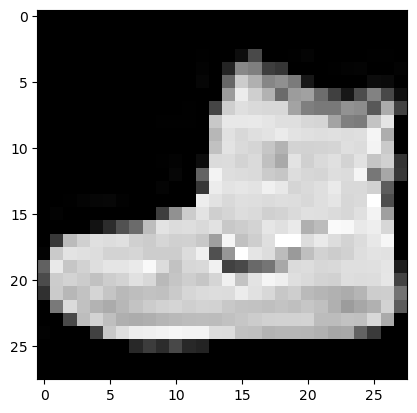

In [10]:
plt.imshow(train_images[0],cmap='gray')


In [11]:
train_labels[0]

9

In [12]:
train_images , test_images = train_images/255 , test_images/255

In [13]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [14]:
train_images.shape

(60000, 28, 28, 1)

In [15]:
test_images.shape

(10000, 28, 28, 1)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3) , activation = 'relu' , input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3) , activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [17]:
 model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5


1875/1875 [==============================] - 22s 11ms/step - loss: 0.4902 - accuracy: 0.8200 - val_loss: 0.3629 - val_accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3191 - accuracy: 0.8828 - val_loss: 0.3180 - val_accuracy: 0.8870
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2720 - accuracy: 0.8992 - val_loss: 0.2940 - val_accuracy: 0.8900
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2417 - accuracy: 0.9105 - val_loss: 0.2712 - val_accuracy: 0.8994
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2175 - accuracy: 0.9194 - val_loss: 0.2821 - val_accuracy: 0.8994


In [19]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)
print("Test Accuracy : ",test_acc)

313/313 - 2s - loss: 0.2821 - accuracy: 0.8994 - 2s/epoch - 6ms/step
Test Accuracy :  0.899399995803833


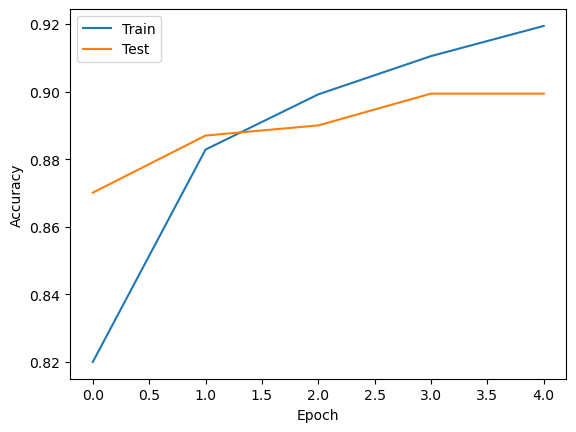

In [23]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

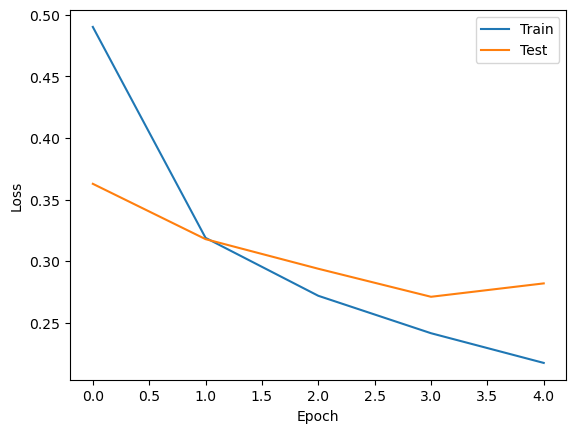

In [24]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [26]:
model.save('trained_fashion_mnist_model.keras')